In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Images are numpy arrays 


### Images are represented in scikit-image using standard numpy arrayys .This allows maximum inter-operability with other libraries in the scientific python ecosystem ,such as matplotlib and scipy

#### Let's see how to build a grayscale image as 2D array

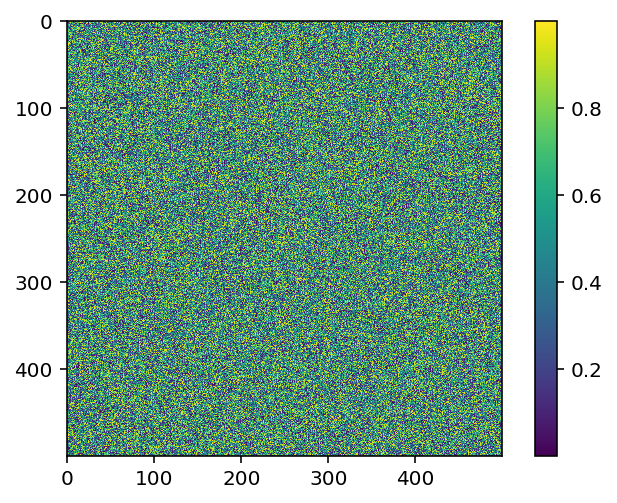

In [7]:
import numpy as np
from matplotlib import pyplot as plt
random_image=np.random.random([500,500])
plt.imshow(random_image)
plt.colorbar()
#plt.imshow(random_image,cmap='gray')
#plt.colorbar()

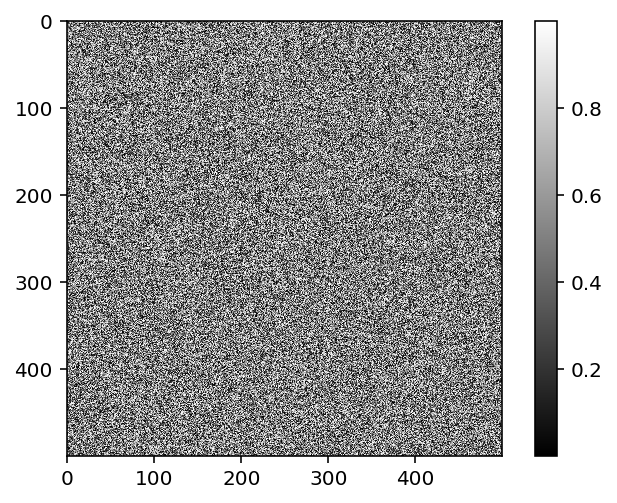

In [10]:
plt.imshow(random_image,cmap='gray')
plt.colorbar()

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


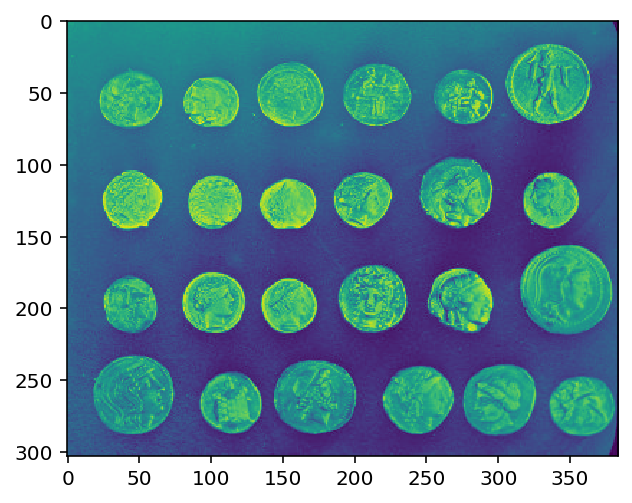

In [9]:
from skimage import data
coins=data.coins()

print('Type:',type(coins))
print('dtype:',coins.dtype)
print('shape:',coins.shape)

plt.imshow(coins)

#### A color image is a 3D array , where the last dimension has size 3 and represents the red,green ,and blue channels 

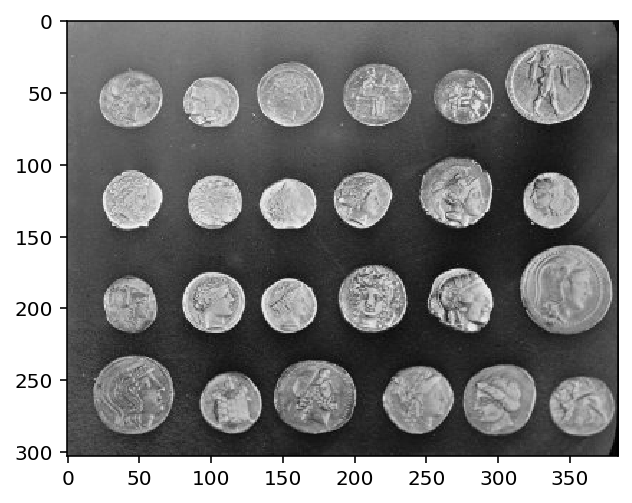

In [11]:
plt.imshow(coins,cmap='gray')

Shape: (300, 451, 3)
Values min 0,max 231:


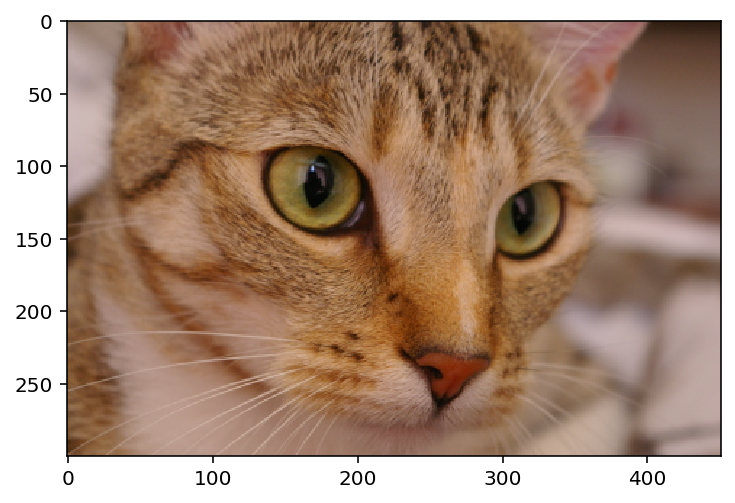

In [15]:
cat=data.chelsea()
print('Shape:',cat.shape)
print('Values min {},max {}:'.format(cat.min(),cat.max()))
plt.imshow(cat)

 These are just NumPy arrays,Ex we can make a red square by using standard array slicing and manupulation

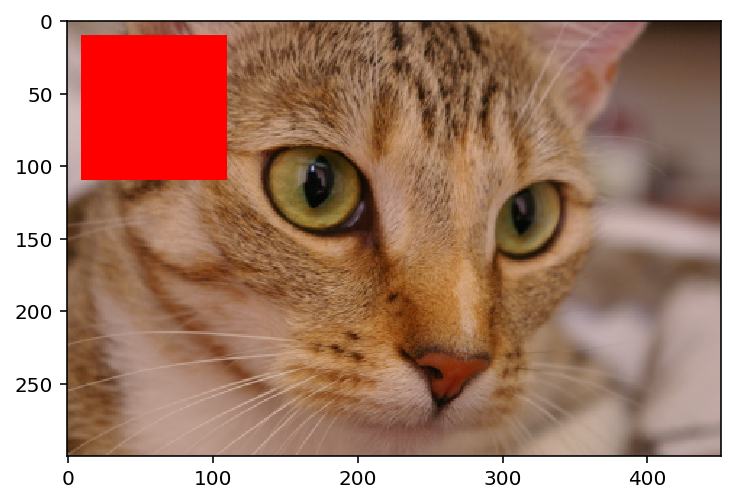

In [16]:
cat[10:110,10:110,:]=[255,0,0] #[red,green,blue]
plt.imshow(cat);

Images can also include transparent regions by adding a 4th 
dimension ,calledan alpha region


### Other shapes, and their meanings

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale (or volumetric) |(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|

### Displaying images using matplotlib

In [22]:
from skimage import data
img0=data.chelsea()
img1=data.rocket()

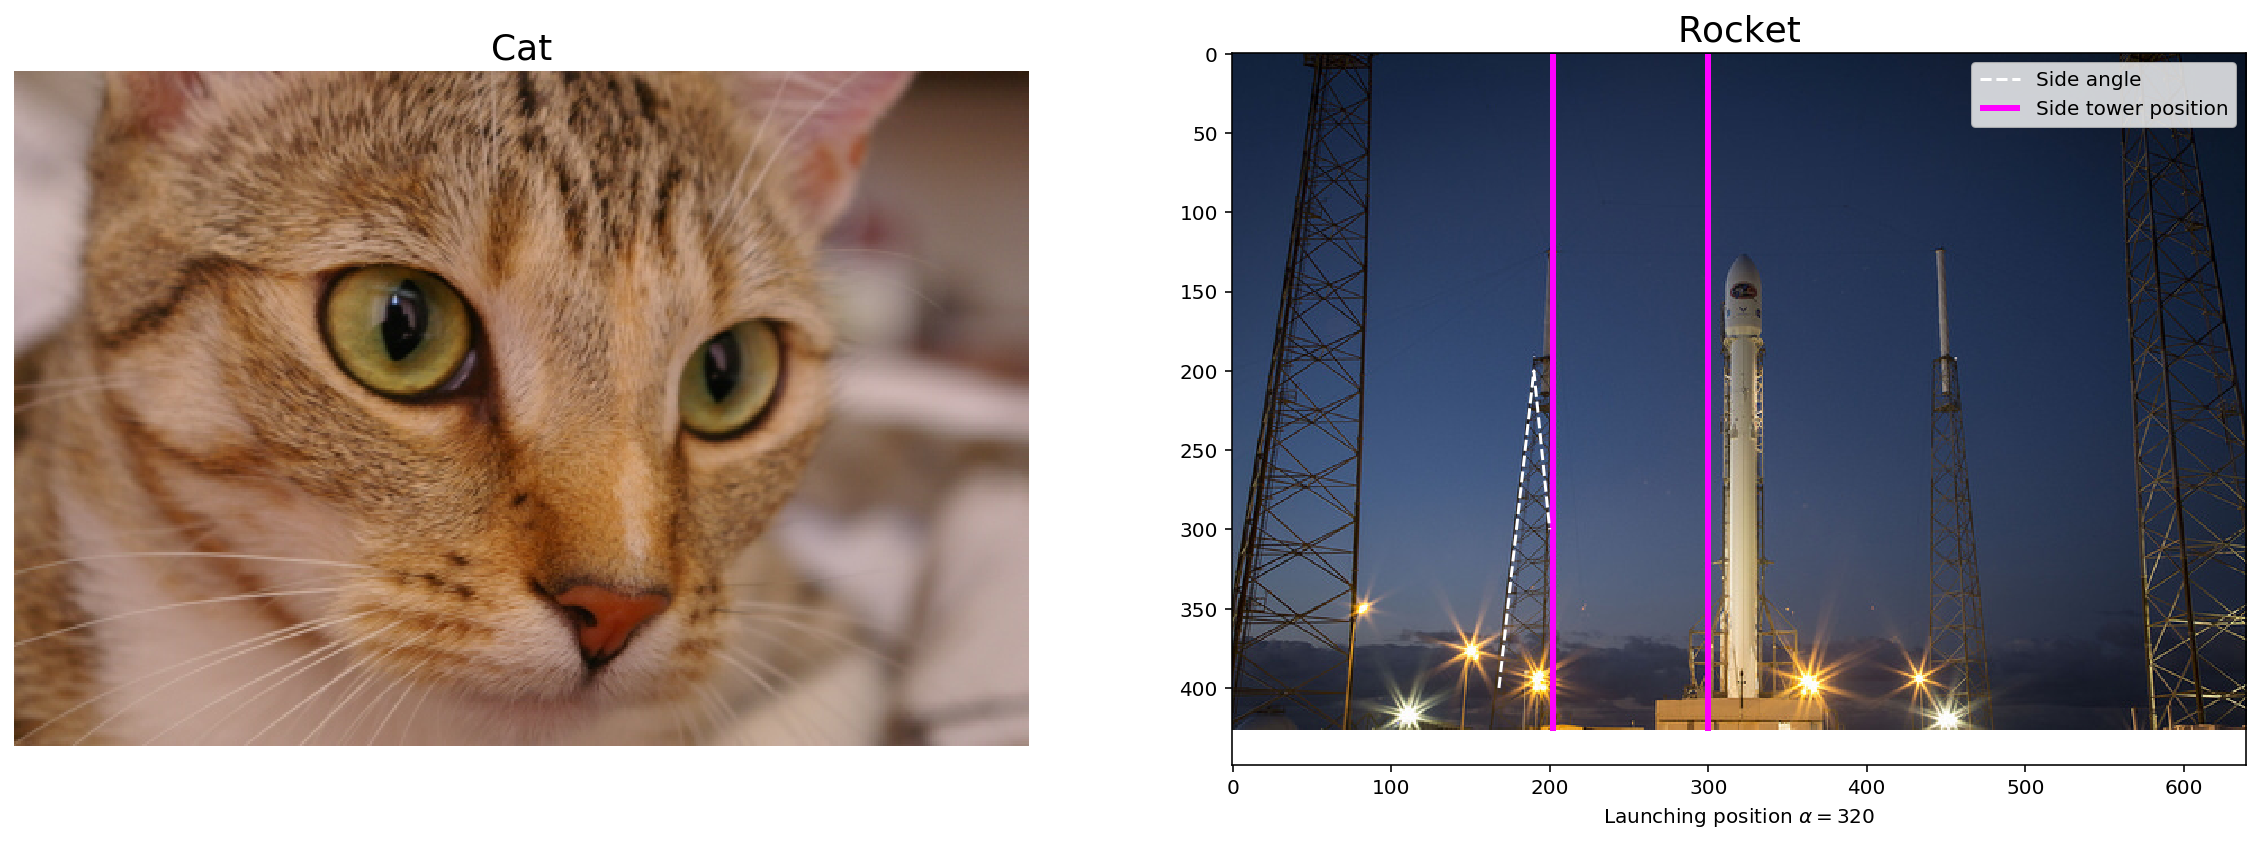

In [23]:
import matplotlib.pyplot as plt

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img0)
ax0.set_title('Cat', fontsize=18)
ax0.axis('off')

ax1.imshow(img1)
ax1.set_title('Rocket', fontsize=18)
ax1.set_xlabel(r'Launching position $\alpha=320$')

ax1.vlines([202, 300], 0, img1.shape[0], colors='magenta', linewidth=3, label='Side tower position')
ax1.plot([168, 190, 200], [400, 200, 300], color='white', linestyle='--', label='Side angle')

ax1.legend();

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions--the choice is determined by the
data-type of the array.

E.g., here, I generate two valid images:

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


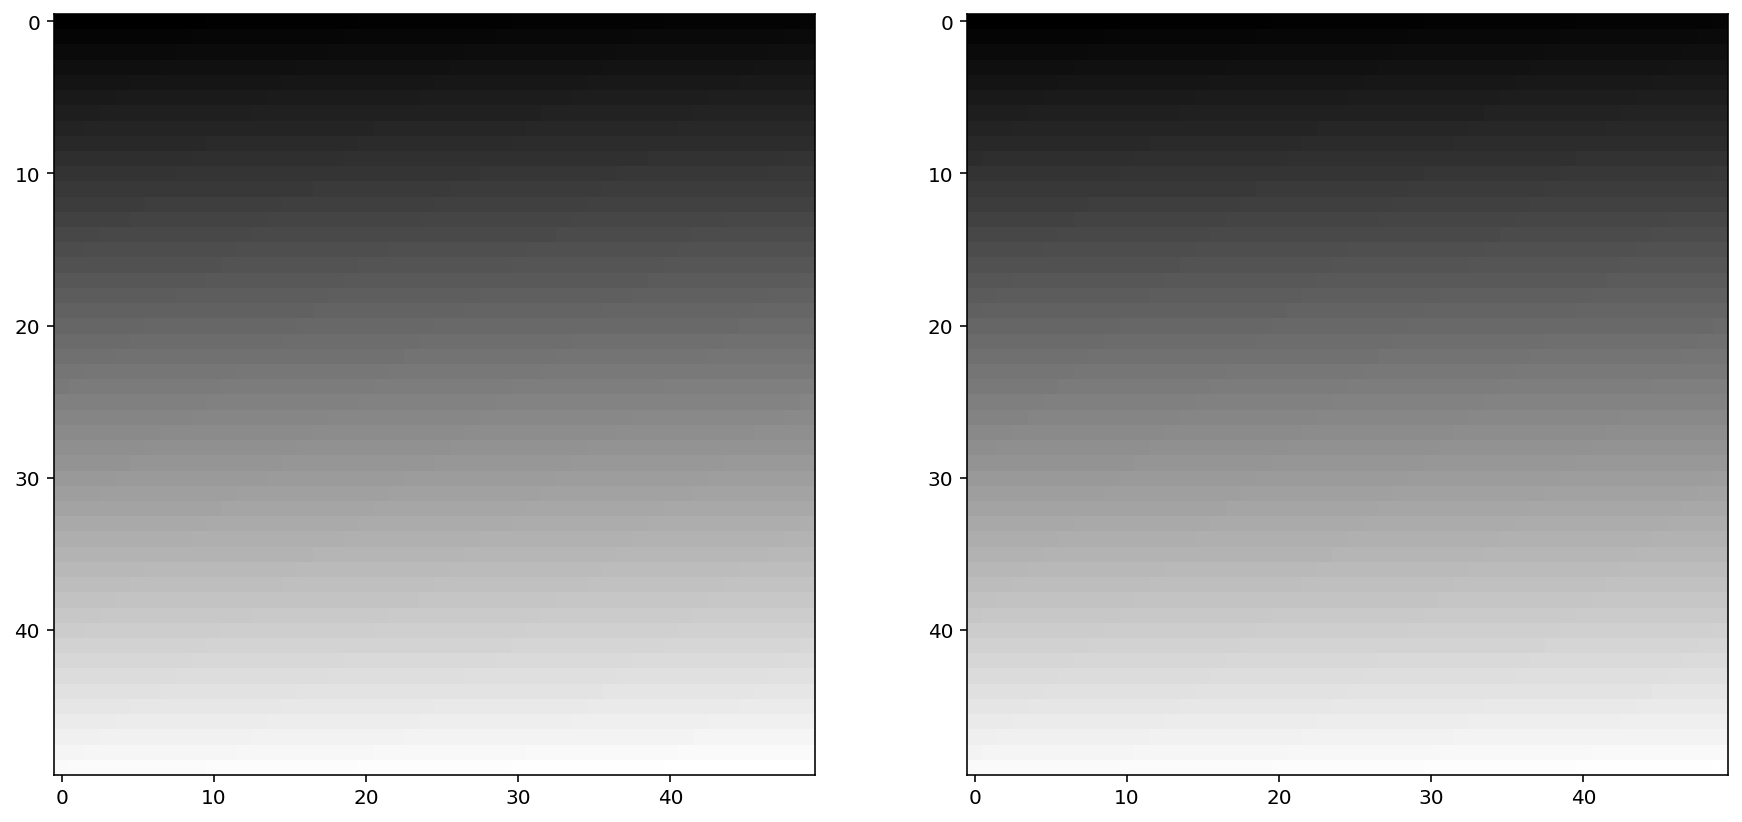

In [24]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

In [25]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_ubyte = img_as_ubyte(image)
image_float = img_as_float(image)

print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())
print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print()
print("231/255 =", 231/255.)

type, min, max: uint8 0 231
type, min, max: float64 0.0 0.9058823529411765

231/255 = 0.9058823529411765


<class 'numpy.ndarray'>
uint8
(333, 272, 3)
7 235


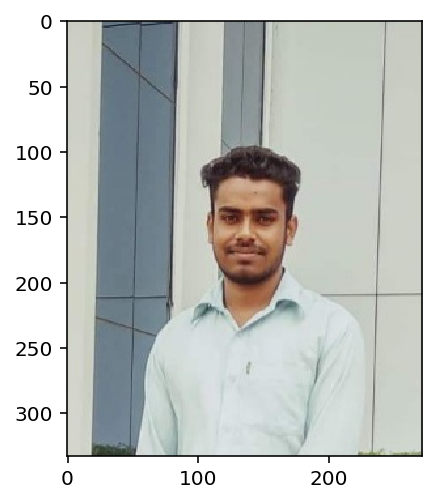

In [26]:
from skimage import io

image = io.imread('../passport_size_photo.jpeg')

print(type(image))
print(image.dtype)
print(image.shape)
print(image.min(), image.max())

plt.imshow(image);

In [27]:
ic = io.ImageCollection('../images/*.png:../images/*.jpg')

print('Type:', type(ic))

ic.files

Type: <class 'skimage.io.collection.ImageCollection'>


[]

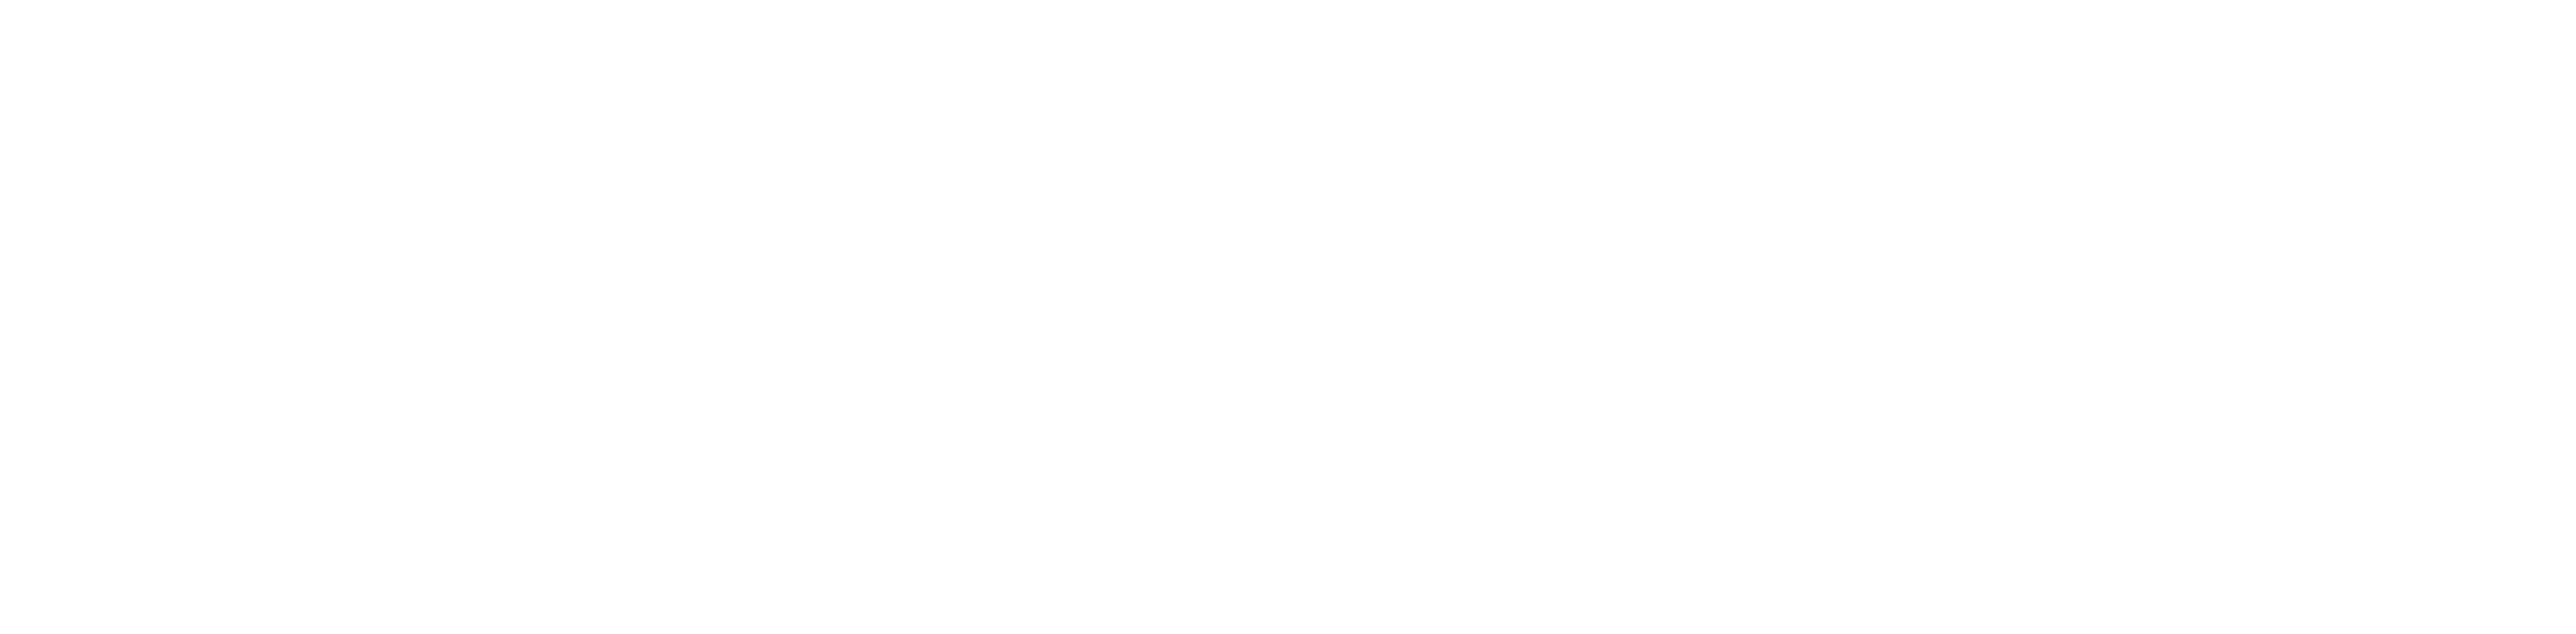

In [28]:
import os

f, axes = plt.subplots(nrows=3, ncols=len(ic) // 3 + 1, figsize=(20, 5))

# subplots returns the figure and an array of axes
# we use `axes.ravel()` to turn these into a list
axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

In [29]:
animals = ['cat', 'dog', 'leopard']

In [30]:
for i, animal in enumerate(animals):
    print('The animal in position {} is {}'.format(i, animal))

The animal in position 0 is cat
The animal in position 1 is dog
The animal in position 2 is leopard


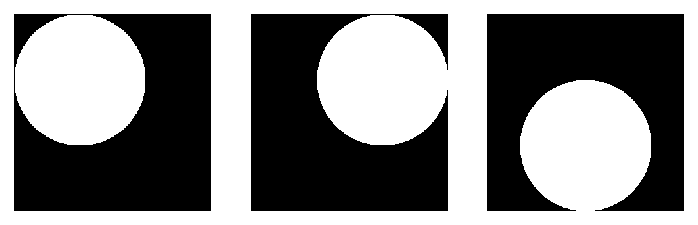

In [32]:
from skimage import draw

red = np.zeros((300, 300))
green = np.zeros((300, 300))
blue = np.zeros((300, 300))

r, c = draw.circle(100, 100, 100)
red[r, c] = 1

r, c = draw.circle(100, 200, 100)
green[r, c] = 1

r, c = draw.circle(200, 150, 100)
blue[r, c] = 1

f, axes = plt.subplots(1, 3)
for (ax, channel) in zip(axes, [red, green, blue]):
    ax.imshow(channel, cmap='gray')
    ax.axis('off')

TypeError: Image data of dtype object cannot be converted to float

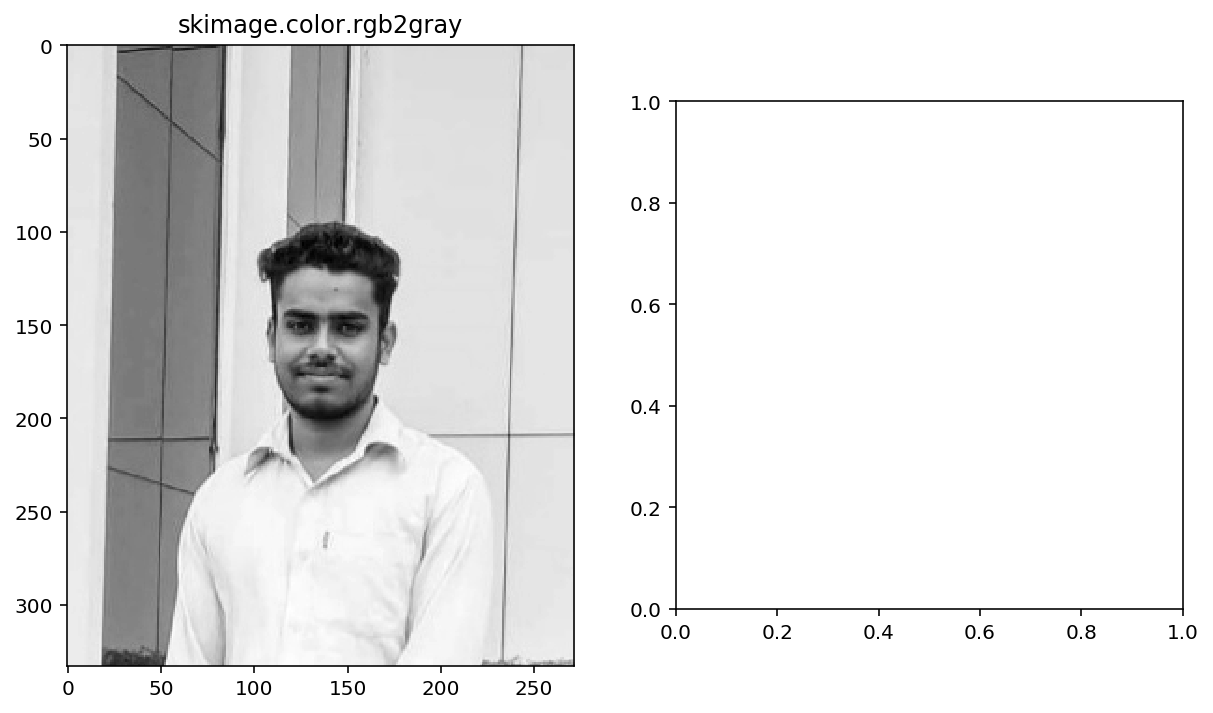

In [34]:
from skimage import color, img_as_float

image = img_as_float(io.imread('../passport_size_photo.jpeg'))

gray = color.rgb2gray(image)
my_gray = ...

# --- display the results ---

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6))

ax0.imshow(gray, cmap='gray')
ax0.set_title('skimage.color.rgb2gray')

ax1.imshow(my_gray, cmap='gray')
ax1.set_title('my rgb2gray')